<a href="https://colab.research.google.com/github/gustavoteixeirah/dataset-celulas-malaria/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define folder paths
FOLDER = "/content/drive/MyDrive/dataset.celulas"
PARASITIZED_FOLDER = os.path.join(FOLDER, "Parasitized/")
UNINFECTED_FOLDER = os.path.join(FOLDER, "Uninfected/")



Mounted at /content/drive


In [12]:
from skimage.io import imread  # Assuming you have scikit-image installed
import time

target_size = (128, 128)

# Function to load and preprocess images with progress counter
def load_and_preprocess_image(folder_path, image_name, start_time):
    image_path = os.path.join(folder_path, image_name)
    image = imread(image_path, as_gray=True)  # Read as grayscale
    image = resize(image, target_size)  # Resize to target dimensions
    # You can add further preprocessing steps here (e.g., normalization)

    # Print progress every 1000 images
    if (len(parasitized_images) + len(uninfected_images)) % 1000 == 0:
        elapsed_time = time.time() - start_time
        print(f"Processed {len(parasitized_images) + len(uninfected_images)} images in {elapsed_time:.2f} seconds.")

    return image


# Load image data
parasitized_images = []
uninfected_images = []
start_time = time.time()  # Start time for progress tracking
print(f"{start_time:.2f} seconds.")

# Limit to loading only 2000 images each
image_count = 0

for image_name in os.listdir(PARASITIZED_FOLDER):
    if (image_name.split('.')[1] == 'png') and image_count < 2000:
        parasitized_images.append(load_and_preprocess_image(PARASITIZED_FOLDER, image_name, start_time))
        image_count += 1

image_count = 0

for image_name in os.listdir(UNINFECTED_FOLDER):
    if (image_name.split('.')[1] == 'png') and image_count < 2000:
        uninfected_images.append(load_and_preprocess_image(UNINFECTED_FOLDER, image_name, start_time))
        image_count += 1

# Print final message after processing all images
elapsed_time = time.time() - start_time
print(f"Finished processing all images in {elapsed_time:.2f} seconds.")

1724039891.86 seconds.
Processed 0 images in 0.30 seconds.
Processed 1000 images in 175.10 seconds.
Processed 2000 images in 182.39 seconds.
Processed 3000 images in 358.45 seconds.
Finished processing all images in 365.13 seconds.


In [13]:
print(f"Shape of first parasitized image: {parasitized_images[0].shape}")
print(f"Shape of first uninfected image: {uninfected_images[0].shape}")

Shape of first parasitized image: (128, 128)
Shape of first uninfected image: (128, 128)


In [22]:
import numpy as np

# Combine images and labels (assuming labels are 0 for uninfected, 1 for parasitized)
X = np.concatenate((np.array(parasitized_images), np.array(uninfected_images)))
y = np.array([1] * len(parasitized_images) + [0] * len(uninfected_images))
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (4000, 128, 128)
Shape of y: (4000,)


In [23]:
# Split data into training and testing sets (consider using scikit-learn's train_test_split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (3200, 128, 128)
Shape of y_train: (3200,)


In [26]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [27]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

print(X_train_flat.shape)
print(X_test_flat.shape)

(3200, 16384)
(800, 16384)


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento de um modelo Random Forest
def train(X_train, y_train, n_estimators=100):
  model = RandomForestClassifier(n_estimators=n_estimators)
  model.fit(X_train, y_train.flatten())
  return model

model = train(X_train_flat, y_train)

Resultados de Teste
Acurácia: 0.78125
F1 score: 0.7813988772746686


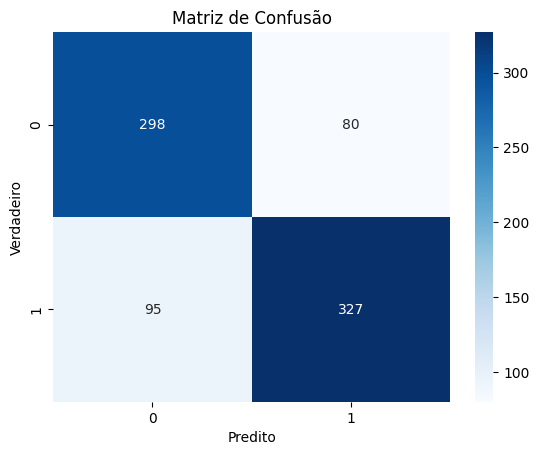

Resultados de Treino
Acurácia: 1.0
F1 score: 1.0


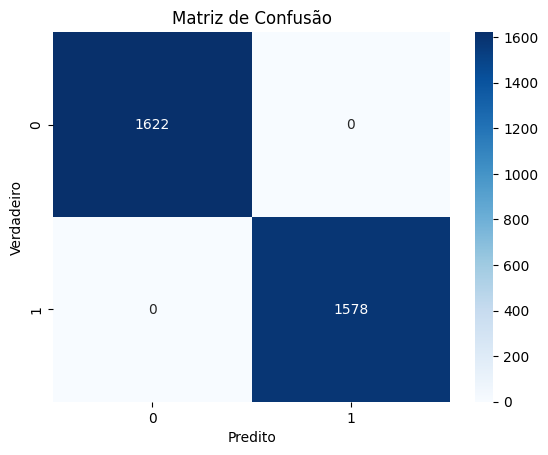

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix

# Inferência e avaliação
def predict_and_evaluate(model, X_test, y_test, normalize=None):

  # Inferência
  y_pred = model.predict(X_test)

  # Métricas
  print('Acurácia:', accuracy_score(y_test, y_pred))
  print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

  # Matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred, normalize=normalize)

  fmt = '.2f' if normalize == 'true' else 'd'
  sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

print('Resultados de Teste')
predict_and_evaluate(model, X_test_flat, y_test)
print('Resultados de Treino')
predict_and_evaluate(model, X_train_flat, y_train)

In [33]:
from sklearn.cluster import KMeans


# Treinamento de um modelo Random Forest
def trainKMeans(X_train, y_train, n_clusters=2):
  model = KMeans(n_clusters=n_clusters)
  model.fit(X_train, y_train.flatten())
  return model

model = trainKMeans(X_train_flat, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Resultados de Teste
Acurácia: 0.14375
F1 score: 0.2269027777777778


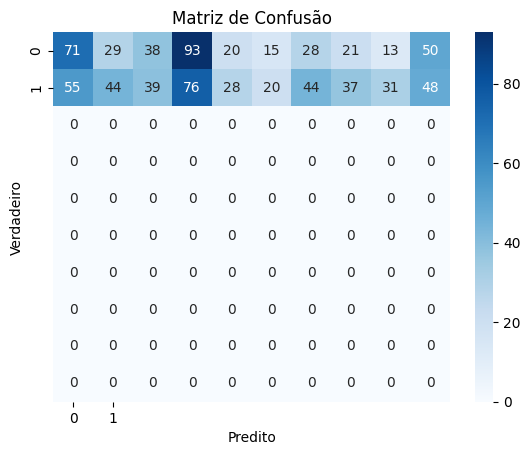

Resultados de Treino
Acurácia: 0.1409375
F1 score: 0.22458685595609404


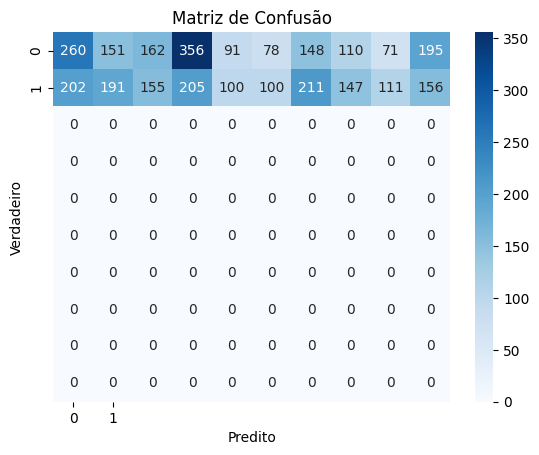

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, confusion_matrix

# Inferência e avaliação
def predict_and_evaluate(model, X_test, y_test, normalize=None):

  # Inferência
  y_pred = model.predict(X_test)

  # Métricas
  print('Acurácia:', accuracy_score(y_test, y_pred))
  print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

  # Matriz de confusão
  conf_matrix = confusion_matrix(y_test, y_pred, normalize=normalize)

  fmt = '.2f' if normalize == 'true' else 'd'
  sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
  plt.title('Matriz de Confusão')
  plt.xlabel('Predito')
  plt.ylabel('Verdadeiro')
  plt.show()

print('Resultados de Teste')
predict_and_evaluate(model, X_test_flat, y_test)
print('Resultados de Treino')
predict_and_evaluate(model, X_train_flat, y_train)